<a href="https://colab.research.google.com/github/thiviyan98/ThiviyanNanthakumarCE888/blob/master/Assignment_2/Ass2Data1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

##1.Import and Reading Dataset

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/thiviyan98/ThiviyanNanthakumarCE888/master/Assignment1/Data/african-country-recession-dataset-2000-to-2017/africa_recession.csv', sep=',', quotechar='"')

### Printing and getting info for Africa Dataset

In [107]:
df

,pop,emp,emp_to_pop_ratio,hc,ccon,cda,cn,ck,ctfp,cwtfp,rconna,rdana,rnna,rkna,rtfpna,rwtfpna,labsh,irr,delta,xr,pl_con,pl_da,pl_gdpo,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,total,excl_energy,energy,metals_minerals,forestry,agriculture,fish,total_change,excl_energy_change,energy_change,metals_minerals_change,forestry_change,agriculture_change,fish_change,growthbucket
0,28.849621,6.914298,0.239667,1.547767,99010.171880,131991.375000,4.265433e+05,0.009374,0.648979,0.626111,95642.992190,131823.703100,7.039534e+05,0.512764,1.068518,1.008857,0.483403,0.119199,0.043679,10.625636,0.307452,0.309123,0.295914,0.618509,0.250884,0.134649,0.121411,-0.182028,0.056574,0.289768,0.314139,0.388684,0.465633,0.481975,0.278865,327.86,223.05,769.06,268.89,289.58,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
1,45.728313,13.623806,0.297929,2.086037,316862.656300,374842.343800,8.046022e+05,0.019658,0.719390,0.657543,308969.156300,379569.906300,1.669636e+06,0.647240,0.973863,0.865942,0.561062,0.108611,0.042740,6.939828,0.348586,0.354220,0.351310,0.670727,0.147136,0.133380,0.135068,-0.130606,0.044295,0.323617,0.385008,0.474147,0.494095,0.520165,0.444091,327.86,223.05,769.06,268.89,289.58,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
2,33.262043,13.323813,0.400571,1.498783,29762.876950,36584.992190,6.707259e+04,0.001670,0.308652,0.292607,36392.964840,43032.312500,1.616443e+05,0.399972,0.985717,0.816634,0.506038,0.188336,0.045847,800.408508,0.358321,0.357803,0.351029,0.672994,0.183977,0.129643,0.035281,-0.087737,0.065842,0.368704,0.355546,0.304422,0.501278,0.487623,0.350502,327.86,223.05,769.06,268.89,289.58,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
3,8.025703,3.869000,0.482076,1.356151,6488.692871,7006.969727,5.790397e+03,0.000184,0.205865,0.234643,7096.825195,7673.087891,1.014219e+04,0.450355,0.703341,0.730731,0.741010,0.080584,0.048116,389.696228,0.281181,0.293343,0.293662,0.869283,0.087738,0.229176,0.024138,-0.017928,-0.192408,0.292345,0.445609,0.238837,0.470837,0.511137,0.402848,327.86,223.05,769.06,268.89,289.58,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
4,1.061468,0.243000,0.228928,1.676330,7620.187500,8419.264648,1.690724e+04,0.000431,0.959765,0.993985,5540.332520,7002.934570,4.100362e+04,1.068165,0.737721,0.752696,0.612079,0.033991,0.057299,6.939828,0.206353,0.235375,0.222508,0.845482,0.102297,0.130042,0.234137,-0.291400,-0.020558,0.200053,0.512144,0.247313,0.487032,0.482645,0.398468,327.86,223.05,769.06,268.89,289.58,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,12.208407,6.215000,0.509075,1.837961,21853.750000,26727.062500,5.534759e+04,0.000896,0.234562,0.248461,21976.162110,27719.333980,4.998828e+04,1.923133,1.000826,1.055834,0.741010,0.083527,0.044079,831.530762,0.381079,0.391507,0.377381,0.794133,0.201298,0.108564,0.053728,-0.130483,-0.027240,0.360865,0.438269,0.528944,0.629605,0.600758,0.257941,413.01,343.16,922.01,567.86,417.58,220.62,1262.71,0.162721,0.105791,0.239561,0.078946,0.198187,0.073211,0.026477,0
482,29.784193,15.389316,0.516694,1.467321,94663.101560,138279.359400,1.080252e+06,0.016209,0.337927,0.287038,95187.382810,146607.406300,9.455603e+05,0.736038,1.318056,1.297615,0.342457,0.106177,0.043241,165.915955,0.870157,0.866256,0.809904,0.472643,0.279236,0.133401,0.340749,-0.110697,-0.115332,0.924084,0.857789,0.679089,0.617483,0.668252,0.419288,413.01,343.16,922.01,567.86,417.58,220.62,1262.71,0.162721,0.105791,0.239561,0.078946,0.198187,0.073211,0.026477,1
483,55.797787,25.301973,0.453458,1.689919,102405.859400,137377.593800,7.739462e+05,0.009984,0.259968,0.248847,100627.859400,140040.656300,6.777018e+05,1.760390,0.972671,0.870758

In [108]:
df.info()
#checked if there is missing values from the coloumn
#486 entries lot of data, 50 variable coloumns (features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pop                     486 non-null    float64
 1   emp                     486 non-null    float64
 2   emp_to_pop_ratio        486 non-null    float64
 3   hc                      486 non-null    float64
 4   ccon                    486 non-null    float64
 5   cda                     486 non-null    float64
 6   cn                      486 non-null    float64
 7   ck                      486 non-null    float64
 8   ctfp                    486 non-null    float64
 9   cwtfp                   486 non-null    float64
 10  rconna                  486 non-null    float64
 11  rdana                   486 non-null    float64
 12  rnna                    486 non-null    float64
 13  rkna                    486 non-null    float64
 14  rtfpna                  486 non-null    fl

In [109]:
#Double check if there is missing values
df.isnull().any().sum()>0

False

In [110]:
df['growthbucket'].value_counts() ##finding the target variable 

0    448
1     38
Name: growthbucket, dtype: int64

In [111]:
df.describe()

,pop,emp,emp_to_pop_ratio,hc,ccon,cda,cn,ck,ctfp,cwtfp,rconna,rdana,rnna,rkna,rtfpna,rwtfpna,labsh,irr,delta,xr,pl_con,pl_da,pl_gdpo,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,total,excl_energy,energy,metals_minerals,forestry,agriculture,fish,total_change,excl_energy_change,energy_change,metals_minerals_change,forestry_change,agriculture_change,fish_change,growthbucket
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,4.860000e+02,486.000000,486.000000,486.000000,486.000000,486.000000,4.860000e+02,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.00000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,20.185755,7.121089,0.357865,1.777389,64361.006942,80885.988722,2.442244e+05,0.004583,0.454419,0.453431,68169.779343,86894.648830,2.960933e+05,0.922019,0.988884,0.956187,0.513159,0.115962,0.048087,447.069460,0.420510,0.425005,0.411562,0.679354,0.206769,0.174061,0.168543,-0.225677,-0.003049,0.430719,0.474535,0.407058,0.623058,0.592560,0.394489,480.433333,315.391667,1205.33000,512.912222,322.411667,221.326667,1009.445556,0.044535,0.030346,0.082411,0.058144,0.024774,0.033930,0.023741,0.078189
std,30.037490,9.921471,0.080541,0.446339,129634.856793,156740.416624,4.725163e+05,0.008210,0.206562,0.203056,136352.268853,164892.302342,5.126251e+05,0.340277,0.143482,0.140860,0.148923,0.073690,0.012163,797.259327,0.126245,0.117072,0.117266,0.158903,0.088993,0.063082,0.142386,0.132546,0.090130,0.136076,0.142659,0.160308,0.104425,0.076358,0.386874,132.323682,65.322380,416.62894,173.040876,44.315222,49.803981,140.125951,0.184025,0.105616,0.288454,0.151285,0.129924,0.127101,0.076937,0.268746
min,1.061468,0.243000,0.198212,1.069451,2781.259277,2984.366943,5.790397e+03,0.000124,0.098622,0.107790,2786.592285,2978.288574,8.735905e+03,0.136824,0.429515,0.382910,0.164316,0.010000,0.024867,1.000000,0.150231,0.146762,0.128689,0.223663,0.049954,0.016554,0.012206,-0.784460,-0.652756,0.154627,0.030470,0.044227,0.375171,0.432636,0.062744,274.690000,205.270000,586.13000,241.900000,245.560000,149.370000,843.660000,-0.359446,-0.173741,-0.477017,-0.157564,-0.174550,-0.225998,-0.113858,0.000000
25%,3.830730,1.048750,0.297922,1.445886,9117.209716,11081.697755,2.429231e+04,0.000514,0.301179,0.295615,8797.567871,10660.792725,3.465814e+04,0.709967,0.946962,0.900594,0.426136,0.063373,0.041254,8.609180,0.338547,0.349186,0.329368,0.594391,0.142124,0.132076,0.059928,-0.299666,-0.034658,0.346740,0.383279,0.299052,0.536308,0.541171,0.294728,355.210000,271.740000,801.96000,331.440000,289.580000,185.770000,899.190000,-0.058931,-0.044322,-0.102940,-0.053405,-0.060792,-0.026451,-0.020995,0.000000
50%,10.868272,4.184000,0.368841,1.689902,17471.495120,22228.022460,6.432356e+04,0.001355,0.400647,0.405870,16610.300780,21656.230470,7.413105e+04,0.933401,1.000000,0.978814,0.523287,0.107553,0.046315,152.079811,0.409295,0.422608,0.408461,0.708287,0.193263,0.168642,0.136851,-0.186369,0.000000,0.416230,0.471758,0.383152,0.640564,0.607994,0.357652,485.785000,326.945000,1285.16500,562.320000,328.020000,213.095000,948.745000,0.061860,0.019950,0.054933,0.046808,0.003277,0.038444,0.006529,0.000000
75%,24.220695,8.517560,0.416717,2.117452,58016.873047,69676.791020,1.886244e+05,0.003227,0.616736,0.603459,61146.049805,81660.662112,2.488039e+05,1.037367,1.038464,1.015393,0.612079,0.161361,0.052742,550.521500,0.490157,0.489201,0.487113,0.792734,0.268336,0.208797,0.221857,-0.126700,0.041204,0.495139,0.558896,0.497188,0.715812,0.645224,0.433157,611.580000,363.530000,1555.86000,642.820000,348.510000,265.400000,1095.320000,0.208732,0.105791,0.245094,0.154531,0.096810,0.112793,0.047421,0.000000
max,190.886307,65.156548,0.555433,2.885300,758455.187500,896604.8

As you can see from above it shows the max values and this shows that standardisation needs to be applied to some of the features. 

### Preprocessing Data

Transforming the data to centre it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

In [0]:
x = df[df.columns[:49]] ##Predictors

y=df['growthbucket'] ## Target variable

Split data into train and test 

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7, random_state=90)


Applying scale function to perform standardisation

In [0]:
from sklearn.preprocessing import StandardScaler


In [115]:
std_scaled=StandardScaler().fit(x_train)
x_train_norm=std_scaled.transform(x_train)

print(x_train_norm)

print(x_train_norm.mean(axis=0)) ## mean

print(x_train_norm.std(axis=0)) ##standard deviation

[[-0.21454672 -0.21907933  0.01290553 ... -0.31174945  1.18530729
  -0.92036076]
 [-0.50684843 -0.49217182  1.18418758 ... -0.61784269  0.31259565
  -0.31126269]
 [-0.12656518  0.01093982  1.06345946 ... -0.97576789 -0.31543155
  -0.59512585]
 ...
 [-0.53909802 -0.55987382  0.38221146 ...  2.11806952  0.83254333
  -0.07706971]
 [-0.24724013 -0.18271809  0.73554281 ... -0.448974   -0.38425353
   1.65993467]
 [ 0.35443604  0.41620568  0.08969735 ... -0.00252711 -0.13506222
  -0.24532112]]
[-8.35932630e-17 -9.40424209e-17 -5.22457894e-17  3.55271368e-16
  0.00000000e+00 -1.04491579e-17 -5.74703683e-17  0.00000000e+00
 -1.93309421e-16  3.91843420e-16 -3.13474736e-17 -1.04491579e-17
 -1.04491579e-17  9.66547104e-17 -9.22138183e-16  9.92996535e-16
  9.40424209e-17  1.28002184e-16  1.41063631e-16  3.26536184e-17
 -1.90697131e-16 -1.61961947e-16 -3.34373052e-16  3.34373052e-16
  2.35106052e-16  1.14940737e-16 -3.91843420e-17  7.83686841e-17
  1.56737368e-17 -3.05637868e-16  3.91843420e-16  2.6

In [0]:
x_test_norm=std_scaled.transform(x_test)


Converting Numpy array to dataframe

In [117]:
training_norm=pd.DataFrame(x_train_norm,index=x_train.index,columns=x_train.columns)

x_train.update(training_norm)

x_train

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:5732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


,pop,emp,emp_to_pop_ratio,hc,ccon,cda,cn,ck,ctfp,cwtfp,rconna,rdana,rnna,rkna,rtfpna,rwtfpna,labsh,irr,delta,xr,pl_con,pl_da,pl_gdpo,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,total,excl_energy,energy,metals_minerals,forestry,agriculture,fish,total_change,excl_energy_change,energy_change,metals_minerals_change,forestry_change,agriculture_change,fish_change
220,-0.214547,-0.219079,0.012906,-1.407444,-0.374823,-0.394989,-0.443370,-0.485546,-0.441856,-0.324760,-0.392036,-0.423881,-0.524763,-0.634472,0.116218,0.247291,0.722110,-0.312170,-0.106897,-0.009208,0.152673,0.348586,0.315119,0.195105,-0.144485,0.685158,-0.946178,0.523883,0.045118,0.071270,0.788732,0.160809,1.290993,0.617779,0.037416,1.602481,0.765021,1.892221,0.836450,-0.480015,0.920369,-0.397190,0.873955,0.105998,0.905864,-0.335731,-0.311749,1.185307,-0.920361
46,-0.506848,-0.492172,1.184188,-0.122435,-0.460790,-0.482646,-0.496951,-0.542897,-1.210831,-1.146426,-0.469465,-0.496649,-0.540807,-0.207972,-0.286983,-0.226854,2.014664,-1.373859,-1.477297,0.332447,-1.583720,-1.583037,-1.510093,0.697689,-0.427443,-0.231331,-0.694918,0.757141,-0.574406,-1.522176,-0.976124,-1.277256,-1.110794,-2.010715,-0.046085,-1.413945,-1.486917,-1.365930,-1.508055,-1.101002,-1.174132,-0.941595,-0.919383,-0.682681,-0.950245,-1.075185,-0.617843,0.312596,-0.311263
73,-0.126565,0.010940,1.063459,-1.013602,-0.318248,-0.286792,-0.070077,0.719332,-1.275903,-1.418412,-0.217605,-0.157833,0.384169,-0.549822,-1.919266,-1.587217,-1.561994,-1.373859,1.496361,-0.493453,-0.382127,-0.510477,-0.447933,-1.884145,1.235648,0.355082,1.997828,0.615422,-2.048684,-0.333209,-0.833312,-0.377623,-2.301841,-1.506173,-0.109739,-1.530675,-1.631051,-1.470040,-1.498800,-1.731271,-1.180328,-1.074926,-0.577730,-0.752861,-0.557978,-0.386976,-0.975768,-0.315432,-0.595126
216,0.034391,0.112156,0.381661,-1.348022,-0.348569,-0.371821,-0.472409,-0.523921,0.364467,0.483488,-0.379463,-0.410861,-0.546527,-0.639650,0.324246,0.272362,-0.670351,3.859612,-0.010688,-0.516487,0.742554,0.761027,0.867318,0.790191,-0.410606,-0.746149,0.298654,-0.644541,0.008485,0.406706,0.326831,1.673024,0.896928,0.834853,0.176894,1.602481,0.765021,1.892221,0.836450,-0.480015,0.920369,-0.397190,0.873955,0.105998,0.905864,-0.335731,-0.311749,1.185307,-0.920361
313,-0.341919,-0.227847,1.697944,-0.315947,-0.396021,-0.417891,-0.472899,-0.519377,-0.985147,-0.899162,-0.409041,-0.438207,-0.553248,0.298933,0.062648,0.293058,1.567403,-0.474016,0.032535,0.173459,0.010871,0.150109,0.108647,1.126867,-0.303920,-1.384910,-0.936997,0.544510,0.036348,-0.239686,0.515753,1.430322,1.226227,0.529988,-0.009247,1.415879,1.528233,1.288944,1.538516,0.188061,1.650716,-0.514588,0.692372,1.410011,0.283041,0.667245,-0.002460,2.311349,-0.451621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.339941,0.415119,0.151808,0.004504,0.723170,1.036335,1.978491,1.815845,0.302135,0.380499,0.639722,0.927295,1.682177,0.298933,0.062648,0.293058,-0.124031,-0.144836,0.260752,-0.535904,0.553453,0.357665,0.230887,-0.977759,1.897504,0.022552,-0.283248,-0.447383,0.871306,0.501422,-0.343452,0.332313,1.075708,1.174713,-0.318093,1.415879,1.528233,1.288944,1.538516,0.188061,1.650716,-0.514588,0.692372,1.410011,0.283041,0.667245,-0.002460,2.311349,-0.451621
159,-0.567306,-0.628872,-1.191387,-0.454604,-0.453629,-0.461820,-0.483676,-0.476966,-0.414746,-0.112151,-0.464654,-0.483193,-0.563557,-1.586787,2.419146,3.217305,0.254764,-1.373859,-0.056527,-0.227542,-1.104526,-0.899327,-1.242804,-1.036250,2.432258,2.324997,-0.236746,-1.315731,0.008485,-0.733992,-0.552895,-1.227684,-0.120128,-0.462516,-0.158992,0.216356,-0.510381,0.477421,-0.735200,0.478971,-0.671244,0.331098,1.137907,-0.058737,1.220219,0.456804,-0.448974,-0.384254,1.659935
114,-0.539098,-0.559874,0.382211,-0.775211,-0.481462,-0.505437,-0.510360,-0.566417,-0.258500,-0.295125,-0.488610

In [118]:
#As you can see the min and max is 0 and 1.
x_train.describe()

,pop,emp,emp_to_pop_ratio,hc,ccon,cda,cn,ck,ctfp,cwtfp,rconna,rdana,rnna,rkna,rtfpna,rwtfpna,labsh,irr,delta,xr,pl_con,pl_da,pl_gdpo,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,total,excl_energy,energy,metals_minerals,forestry,agriculture,fish,total_change,excl_energy_change,energy_change,metals_minerals_change,forestry_change,agriculture_change,fish_change
count,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02
mean,-1.075937e-16,-5.191925e-17,-2.898009e-18,3.455365e-16,-2.906172e-17,-2.024524e-17,-8.228712e-17,4.898043e-17,-2.125751e-16,4.151908e-16,-3.363323e-17,1.338798e-17,-6.073573e-17,6.987874e-17,-9.158626e-16,9.916904e-16,8.975663e-17,1.277573e-16,1.426963e-16,4.244970e-18,-2.152690e-16,-1.680845e-16,-3.750166e-16,3.412303e-16,2.586167e-16,1.206551e-16,-5.240906e-17,8.832804e-17,3.167401e-17,-3.110257e-16,3.875985e-16,4.953146e-17,5.374786e-16,2.651474e-16,1.652273e-16,2.631882e-16,-4.741305e-16,6.168269e-16,-2.462083e-16,1.015854e-15,-1.691457e-16,5.647443e-16,3.134747e-17,8.587902e-17,-2.906172e-17,-8.620555e-17,8.310091e-18,3.338832e-17,-2.008198e-17
std,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00
min,-6.304562e-01,-6.824043e-01,-2.004274e+00,-1.580945e+00,-4.852801e-01,-5.084543e-01,-5.131982e-01,-5.664165e-01,-1.598586e+00,-1.683117e+00,-4.926456e-01,-5.232803e-01,-5.843662e-01,-2.424517e+00,-3.873650e+00,-4.018315e+00,-2.389144e+00,-1.373859e+00,-1.889727e+00,-5.443963e-01,-2.183773e+00,-2.382636e+00,-2.400456e+00,-2.896061e+00,-1.740608e+00,-2.433968e+00,-1.089832e+00,-4.250188e+00,-6.793188e+00,-2.096445e+00,-2.969195e+00,-1.814232e+00,-2.336586e+00,-2.111498e+00,-7.525737e-01,-1.530675e+00,-1.631051e+00,-1.470040e+00,-1.508055e+00,-1.731271e+00,-1.398793e+00,-1.182257e+00,-2.273627e+00,-1.998696e+00,-1.978912e+00,-1.442762e+00,-1.542170e+00,-2.138726e+00,-1.822041e+00
25%,-5.464876e-01,-6.002774e-01,-7.401622e-01,-7.325534e-01,-4.382958e-01,-4.585377e-01,-4.748178e-01,-5.170113e-01,-7.664005e-01,-7.864282e-01,-4.509018e-01,-4.787397e-01,-5.391424e-01,-6.357661e-01,-2.857866e-01,-3.914251e-01,-5.928642e-01,-7.567582e-01,-5.184706e-01,-5.352646e-01,-6.299176e-01,-6.709283e-01,-7.110328e-01,-5.641879e-01,-7.421505e-01,-6.603262e-01,-7.407660e-01,-6.111853e-01,-2.987748e-01,-6.400561e-01,-5.989136e-01,-6.518658e-01,-9.384395e-01,-6.773260e-01,-2.488082e-01,-9.231041e-01,-6.246888e-01,-9.514590e-01,-9.964750e-01,-7.347037e-01,-6.712438e-01,-7.800911e-01,-6.088363e-01,-7.528609e-01,-6.766976e-01,-7.732797e-01,-6.561481e-01,-5.149634e-01,-5.951258e-01
50%,-3.295520e-01,-3.013837e-01,1.236428e-01,-2.251319e-01,-3.742036e-01,-3.883208e-01,-3.844973e-01,-4.112684e-01,-2.590502e-01,-2.320290e-01,-3.954752e-01,-4.137928e-01,-4.604226e-01,5.141096e-02,6.264843e-02,1.865114e-01,6.141704e-02,-1.040998e-01,-1.633098e-01,-3.873859e-01,-8.751268e-0

In [119]:
testing_norm_col=pd.DataFrame(x_test_norm,index=x_test.index,columns=x_test.columns)

x_test.update(testing_norm_col)

x_test

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:5732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


,pop,emp,emp_to_pop_ratio,hc,ccon,cda,cn,ck,ctfp,cwtfp,rconna,rdana,rnna,rkna,rtfpna,rwtfpna,labsh,irr,delta,xr,pl_con,pl_da,pl_gdpo,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,total,excl_energy,energy,metals_minerals,forestry,agriculture,fish,total_change,excl_energy_change,energy_change,metals_minerals_change,forestry_change,agriculture_change,fish_change
344,-0.456361,-0.503934,-0.448983,-0.524158,-0.434137,-0.454576,-0.482605,-0.513107,-0.745407,-0.492304,-0.445008,-0.473545,-0.562175,0.867450,0.442467,-0.288124,0.180329,-0.284137,2.150358,4.657738,-0.102280,0.028588,-0.060212,1.279785,0.071120,-0.660356,0.079075,-1.222106,-0.190326,-0.064965,0.346243,-0.583790,1.161607,0.646418,-0.207943,1.120092,1.547007,0.859960,1.454300,0.361022,1.772841,-0.477435,-0.608836,-0.297359,-0.676698,-0.552247,-0.002527,-0.135062,-0.245321
274,4.176668,4.068773,-0.394196,-0.020535,4.231441,4.201827,2.476459,3.806594,0.725292,0.439342,4.123570,4.093089,2.389943,0.378207,-0.291354,0.494153,-0.039704,0.443414,0.701105,-0.365566,0.168758,0.246669,0.408653,-0.012812,-0.588562,-1.116063,0.149990,1.094879,-0.365952,0.138131,0.285957,-0.111936,-0.502510,0.890155,-0.021800,0.664866,0.570622,0.675070,0.892727,0.018947,0.184626,-0.445206,0.911772,1.286485,0.534860,0.625462,2.155624,0.618099,1.276007
231,0.342891,-0.095278,-1.984931,-0.596535,0.072210,0.080529,-0.279469,-0.057505,0.766661,0.846998,0.063797,0.197222,0.167158,-0.209960,-0.334964,-0.233913,1.141531,-0.537763,2.146667,-0.543090,1.120844,1.156204,1.134357,0.787412,0.202221,-1.876518,-0.912567,0.860703,0.008480,0.962032,0.590161,1.048309,-0.667623,1.364113,0.168595,1.602481,0.765021,1.892221,0.836450,-0.480015,0.920369,-0.397190,0.873955,0.105998,0.905864,-0.335731,-0.311749,1.185307,-0.920361
401,-0.192514,0.056586,2.252460,1.770397,-0.276203,-0.314147,-0.311358,-0.403615,-1.142707,-1.032046,-0.303779,-0.350032,-0.418783,0.222810,1.009689,0.658603,0.261979,0.110842,-0.996631,-0.544396,1.004337,1.034971,1.109141,0.191831,-1.040103,2.317881,-0.175382,-0.926844,0.545107,1.374825,0.578798,-0.065781,1.037727,0.544995,-0.124067,1.011360,0.943219,0.994441,0.574318,1.315028,1.258160,1.952726,-0.394898,-0.582604,-0.356307,-0.773280,0.015260,-0.514963,1.868051
442,-0.522631,-0.543666,0.289975,-0.538878,-0.479753,-0.503038,-0.486001,-0.549163,-1.069557,-0.933888,-0.487717,-0.518213,-0.566963,0.368402,-1.996586,-0.993277,-2.389144,-0.015628,-1.454142,0.164800,0.945539,1.142903,1.220982,1.695230,-1.190359,-0.852376,-0.832841,1.067808,-1.295624,0.843170,2.073580,0.558433,0.364523,1.016029,0.145566,-0.923104,-0.040433,-1.091154,0.116901,0.599411,-0.275489,1.616754,-0.799090,-0.942581,-0.727762,-0.581697,0.175704,-1.696533,0.049402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,0.936928,1.474820,1.179295,-0.238574,0.160600,0.222889,0.776084,0.457770,-0.753395,-0.930109,0.105026,0.175480,0.466655,1.710407,-0.134642,-0.600913,0.175258,-0.134340,-0.303080,1.839714,-0.295016,-0.308915,-0.521025,-0.900475,0.366873,-0.560595,-0.576803,0.005422,2.352601,-0.282599,-0.482762,-0.376869,0.371073,0.480490,-0.457261,-0.647388,0.280992,-0.852947,0.189576,0.252355,0.575983,1.375875,-2.273627,-1.448122,-1.978912,-1.143822,-1.144458,-1.283514,-1.142116
391,-0.316611,-0.175056,1.881239,-0.076503,-0.371484,-0.391342,-0.446150,-0.498521,-1.051969,-0.950157,-0.385134,-0.410423,-0.533685,1.483198,0.005428,0.504015,1.567403,-0.536156,-0.173260,0.271147,-0.012333,0.133904,0.088547,0.961304,-0.100742,-1.047562,-0.851294,0.516621,-0.195498,-0.264416,0.463274,1.119010,1.083963,0.793733,-0.123238,1.011360,0.943219,0.994441,0.574318,1.315028,1.258160,1.952726,-0.394898,-0.582604,-0.356307,-0.773280,0.015260,-0.514963,1.868051
272,0.076343,0.153585,0.337900,-1.328677,-0.342547,-0.364746,-0.454207,-0.499068,-0.082034,0.066446,-0.363791,-0.393808,-0.534688,-0.0771

In [120]:
x_test.describe()

,pop,emp,emp_to_pop_ratio,hc,ccon,cda,cn,ck,ctfp,cwtfp,rconna,rdana,rnna,rkna,rtfpna,rwtfpna,labsh,irr,delta,xr,pl_con,pl_da,pl_gdpo,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,total,excl_energy,energy,metals_minerals,forestry,agriculture,fish,total_change,excl_energy_change,energy_change,metals_minerals_change,forestry_change,agriculture_change,fish_change
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,-0.155846,-0.151079,0.075402,0.070737,-0.087918,-0.078983,-0.044714,-0.028412,-0.035588,-0.020138,-0.120150,-0.109800,-0.116902,0.167067,-0.046767,-0.043427,0.013902,0.017188,0.066719,-0.033587,0.178840,0.170015,0.186374,0.013861,0.138260,-0.036419,0.047272,-0.086348,-0.077513,0.172339,0.073683,0.068935,0.192341,0.197007,-0.086738,0.072501,0.120507,0.059021,0.134328,0.028532,0.131316,0.061299,-0.118700,-0.113433,-0.104732,-0.187409,0.034278,-0.078666,-0.013572
std,0.669915,0.680651,1.071640,1.031846,0.878010,0.912314,0.966822,1.087999,0.975187,0.949575,0.822870,0.866727,0.925596,1.255464,0.965405,0.945180,1.070854,0.855150,0.999756,0.839478,1.134047,1.068679,1.048475,1.062370,1.083249,0.896748,1.029190,1.127399,0.775309,1.176375,0.860401,0.926133,1.015930,1.104864,0.225601,0.992979,0.957342,1.002275,0.954902,1.010549,0.978553,1.047541,1.059007,1.050511,1.010001,0.890555,1.038972,1.108467,1.054099
min,-0.630107,-0.682034,-1.984931,-1.538689,-0.483340,-0.507088,-0.511699,-0.566175,-1.720724,-1.636570,-0.490346,-0.520746,-0.580731,-2.454439,-3.366490,-3.832407,-2.389144,-1.373859,-1.745794,-0.544396,-1.851317,-1.796829,-1.751749,-2.918251,-1.769121,-1.999867,-1.093718,-4.412377,-3.631006,-1.856866,-2.626562,-2.195114,-2.303928,-2.043922,-0.655618,-1.530675,-1.631051,-1.470040,-1.508055,-1.731271,-1.398793,-1.182257,-2.273627,-1.998696,-1.978912,-1.442762,-1.542170,-2.138726,-1.822041
25%,-0.545074,-0.610951,-0.721517,-0.729003,-0.437384,-0.455934,-0.472921,-0.517604,-0.742484,-0.705218,-0.450380,-0.476674,-0.533403,-0.484348,-0.334176,-0.404812,-0.667894,-0.588892,-0.578546,-0.535404,-0.529191,-0.509066,-0.576862,-0.475025,-0.602775,-0.613682,-0.805110,-0.589328,-0.435741,-0.508377,-0.568112,-0.581106,-0.505409,-0.523548,-0.234782,-0.923104,-0.510381,-0.951459,-0.735200,-0.734704,-0.632268,-0.780091,-0.799090,-0.942581,-0.727762,-1.075185,-0.656148,-0.777314,-0.595126
50%,-0.353064,-0.332317,0.227578,-0.039694,-0.382747,-0.392197,-0.405410,-0.416344,-0.291012,-0.255139,-0.398269,-0.414998,-0.457376,0.144432,0.012528,0.035476,0.099499,-0.104286,-0.043088,-0.304487,0.009253,0.138070,0.179160,0.181185,-0.072393,-0.106887,-0.188363,0.179221,0.008485,-0.032069,0.053123,-0.066076,0.366940,0.416198,-0.101961,-0.092032,0.280992,-0.024413,0.359150,0.188061,0.025324,-0.397190,0.039691,-0.209568,-0.153358,-0.335731,-0.002527,-0.071802,-0.217653
75%,0.044080,0.034103,0.762326,0.762742,-0.116551,-0.157916,-0.237099,-0.281066,0.724802,0.637340,-0.130981,-0.126302,-0.255908,0.513654,0.245629,0.383111,0.682840,0.641461,0.622500,0.087191,0.727730,0.729458,0.771041,0.800304,0.692067,0.377640,0.534566,0.706671,0.372311,0.633078,0.662312,0.665566,0.945550,0.887288,0.046755,1.011360,0.765021,0.859960,0.782572,0.599411,0.920369,0.640345,0.873955,0.645929,0.534860,0.563229,0.571361,0.618099,0.308782
max,4.307860,4.106890,2.252460,2.470138,4.332024,4.246073,5.124399,4.625322,2.323033,2.516193,4.123570,4.093089,4.145495,6.786725,6.664689,3.418088,2.014664,3.025290,3.700148,4.663876,4.260246,3.773529,3.045816,1.695230,4.046827,2.317881,3.797

In [0]:
#as its a large number of features, it can lead to overfitting, therefore, feature selection is used to select important features
import sklearn.feature_selection

select=sklearn.feature_selection.SelectKBest(k=20)
selected_features=select.fit(x_train,y_train)
indices_selected=selected_features.get_support(indices=True)

colnames_selected=[x.columns[i] for i in indices_selected]
x_train_selected=x_train[colnames_selected]

x_test_selected=x_test[colnames_selected]


In [122]:
#features that have been selected
colnames_selected 

['emp_to_pop_ratio',
 'ctfp',
 'cwtfp',
 'rtfpna',
 'rwtfpna',
 'csh_g',
 'csh_m',
 'csh_r',
 'pl_i',
 'pl_g',
 'pl_x',
 'pl_m',
 'total',
 'excl_energy',
 'energy',
 'metals_minerals',
 'forestry',
 'agriculture',
 'forestry_change',
 'fish_change']

###Checking the imbalance

The distributions shows how skewed these features are.

###Bar Graph for distribution

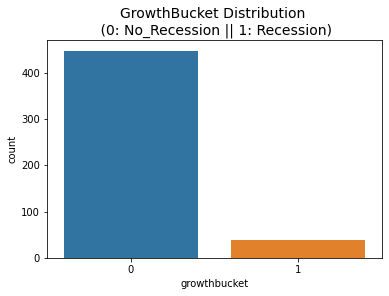

In [123]:
plt.title('GrowthBucket Distribution \n (0: No_Recession || 1: Recession)', fontsize=14)
sns.countplot(y,data=df)


###Pie Chart Representing Percentage of Imbalance

In [124]:
recession= len(df[df['growthbucket']==1])
no_recession=len(df[df['growthbucket']==0])

percentofrecession= recession/(recession+no_recession)
percentofnorecession= no_recession/(recession+no_recession)

print("Percentage of Recession is", percentofrecession*100)
print("Percentage of No Recession is", percentofnorecession*100)

Percentage of Recession is 7.818930041152264
Percentage of No Recession is 92.18106995884774


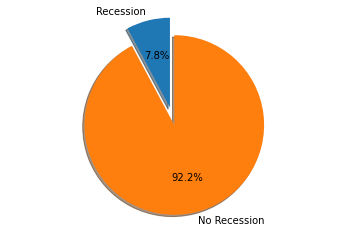

In [125]:
labels = 'Recession','No Recession'

sizes=[percentofrecession,percentofnorecession]

explode=(0.2,0)

fig1, ax1 =plt.subplots()

ax1.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%', shadow= True, startangle=90)

ax1.axis('equal')

plt.show()

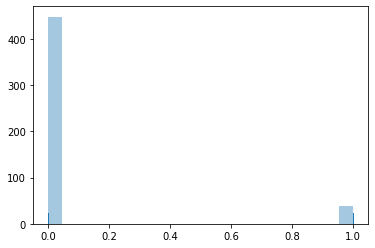

In [126]:
# histogram of the distribution of recession and no recession
y=df[['growthbucket']].values
sns.distplot(y,kde=False,rug=True)

###Inspection of Dataset for some features

In [0]:
##Distribution of the population of the countries to employment ratio on the train and test data

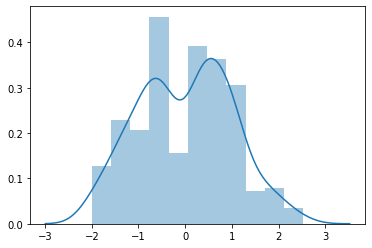

In [128]:
#train data
emppop=x_train_selected['emp_to_pop_ratio'].values
sns.distplot(emppop)

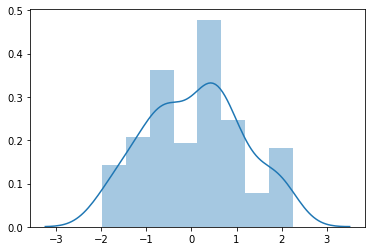

In [129]:
#test data 
emppop1=x_test_selected['emp_to_pop_ratio'].values
sns.distplot(emppop1)

In [0]:
#using the total feature, this will show the distribution of the Total annual Bank of Canada commodity price index for the train and test data

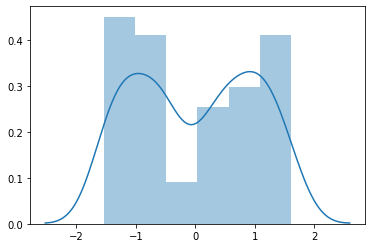

In [131]:
#train data
total=x_train_selected['total'].values
sns.distplot(total)

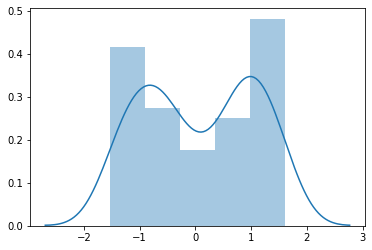

In [132]:
#test data 
total1=x_test_selected['total'].values
sns.distplot(total1)

In [0]:
#using the total feature, this will show the distribution of the year on year percentage change annual Bank of Canada commodity price index- Fish for the train and test data

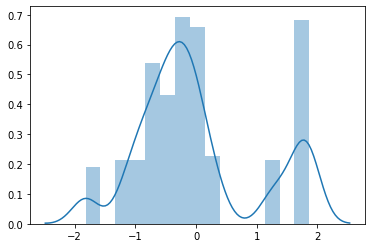

In [134]:
#train data
fishchange=x_train_selected['fish_change'].values
sns.distplot(fishchange)

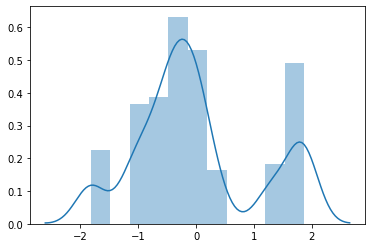

In [135]:
#test data 
fishchange1=x_test_selected['fish_change'].values
sns.distplot(fishchange1)

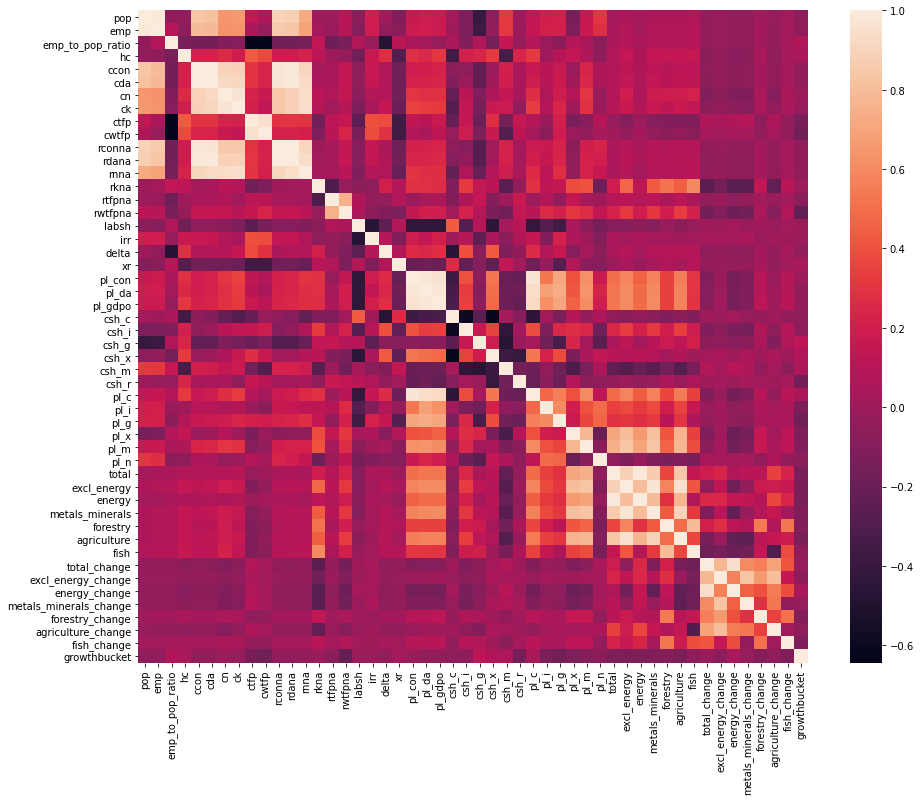

In [136]:
#Heatmap shows the correlation between each feature including the one that was not selected by the algorithm
plt.figure(figsize=(15,12))
sns.heatmap(data=df.corr())

##2.To establish a baseline, perform cross-validation on your dataset using a decision tree and a random forest.

In [0]:
#as its a large number of features, it can lead to overfitting, therefore, feature selection is used to select important features
#import sklearn.feature_selection

#select=sklearn.feature_selection.SelectKBest(k=20)
#selected_features=select.fit(x,y)
#indices_selected=selected_features.get_support(indices=True)

#colnames_selected=[x.columns[i] for i in indices_selected]
#x_selected=x[colnames_selected]

#x_selected.info()

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer

In [139]:
#kf = KFold(shuffle=True, n_splits=5)
clf = DecisionTreeClassifier(random_state=0)

scores=cross_val_score(clf,x,y,cv=10)
scores

array([0.06122449, 0.42857143, 0.89795918, 0.91836735, 0.91836735,
       0.79591837, 0.41666667, 0.91666667, 0.41666667, 0.8125    ])

In [140]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.66 (+/- 0.58)


In [141]:
clf=RandomForestClassifier()

scores=cross_val_score(clf,x,y.flatten(),cv=10,scoring=make_scorer(acc))

scores

array([0.63265306, 0.42857143, 0.89795918, 0.93877551, 0.97959184,
       0.93877551, 0.91666667, 0.9375    , 0.89583333, 0.91666667])

In [142]:
print("ACC: %0.2f +/- %0.2f" % (scores.mean(), scores.std()))

ACC: 0.85 +/- 0.17
